<a href="https://colab.research.google.com/github/NikhilaRaj7337/Machine_Vision/blob/main/Machine_Vision_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the input file from local computer
path = '/content/drive/MyDrive/test3.img'
with open(path, 'rb') as file:
    data = file.read()

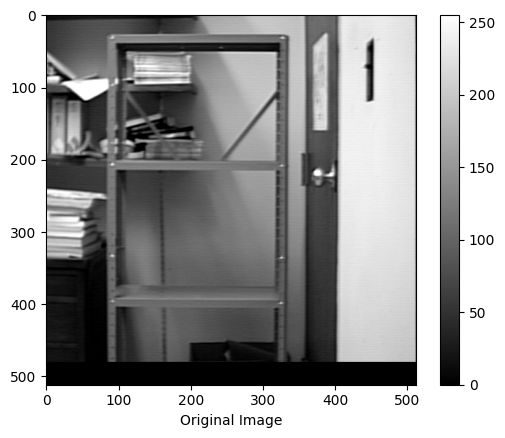

<Figure size 640x480 with 0 Axes>

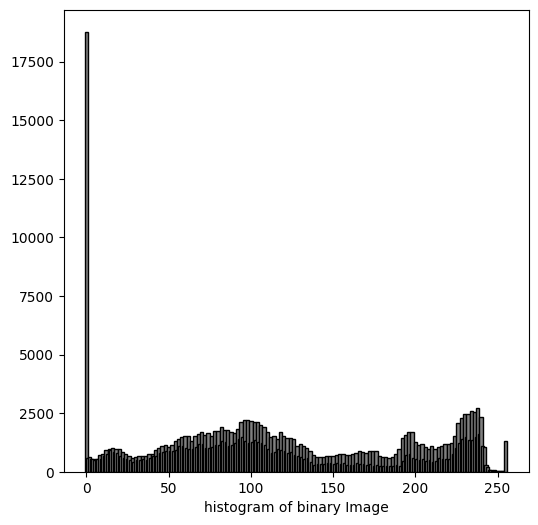

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt

# Read the image from comb.img file and strip the 512-byte header
input_file = '/content/drive/MyDrive/test3.img'
shape = (512, 512)  # matrix size
dtype = np.uint8

#Stripping the 512 header
with open(input_file, 'rb') as bf:
    bf.seek(512)  # stripping the 512-size header in front
    data = np.fromfile(bf, dtype)
    image = data.reshape(shape)  # reshape the image as 2D array of 512 pixels and load the image

# Display Original Image
plt.imshow(image,cmap = 'gray')
plt.xlabel("Original Image")
plt.colorbar()
plt.show()

#Calculate the histogram of the image
hist_image, bins = np.histogram(image.flatten(), 256, [0, 256])

# Leaving Gap after image, before plotting the histogram
plt.subplots_adjust(hspace=3)

# Plot the histogram
plt.figure(figsize=(6, 6))
plt.bar(bins[:-1], hist_image, width=2, color='gray', edgecolor='black')
plt.xlabel("histogram of binary Image")
plt.show()

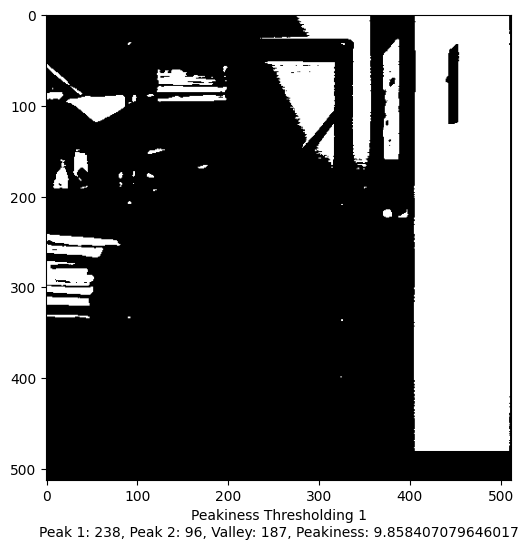

<Figure size 100x100 with 0 Axes>

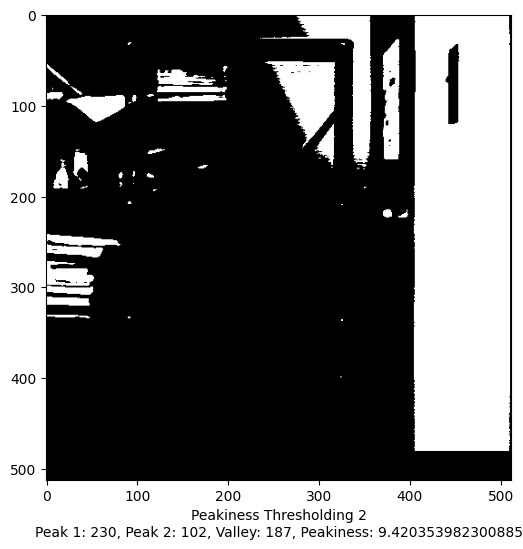

<Figure size 100x100 with 0 Axes>

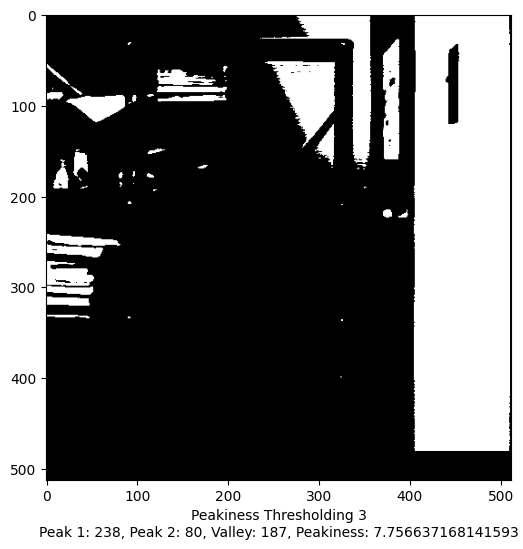

In [ ]:
####### Thresholding using Peakiness Detection #########

# Calculate significant peaks in the histogram
peaks = []

# Identify local maxima in the histogram
for i in range(1, len(hist_image) - 1):
    if hist_image[i] > hist_image[i - 1] and hist_image[i] > hist_image[i + 1]:
        peaks.append((i, hist_image[i]))  # Append index and intensity value as a tuple

# Sort peaks by intensity in descending order
peaks.sort(key=lambda x: x[1], reverse=True)

# Find the two highest peaks that are at least min_distance apart
min_distance = 5  # Minimum distance threshold
peakiness_array = []  # Store (peak1, peak2, valleyPix, peakiness)

for i in range(len(peaks)):
    for j in range(i + 1, len(peaks)):
        gi, gj = peaks[i][0], peaks[j][0]
        if abs(gi - gj) >= min_distance:
            # Find the lowest valley (gk) between gi and gj
            valley = min(range(min(gi, gj), max(gi, gj) + 1), key=lambda x: hist_image[x])

            # Compute peakiness
            peakiness = min(hist_image[gi], hist_image[gj]) / hist_image[valley]

            # Store the combination
            peakiness_array.append((gi, gj, valley, peakiness))

#Sorting peakiness values in descending order
peakiness_array.sort(key=lambda x: x[3], reverse=True)

# Extracting the highest peakiness value
#highest_peakiness = peakiness_array[0]

# Extract the highest 3 peakiness values while ensuring a significant range difference
#First, extracting the highest peak
if peakiness_array:
    highest_peakiness = peakiness_array[0]  # Best peakiness (max)
    second_peakiness = None
    third_peakiness = None

    # Extracting the second  and third peaks
    for peak in peakiness_array[1:]:
        # Here, I'm taking the second peak within a certain range
        if (second_peakiness is None and abs(peak[0] - highest_peakiness[0]) >= min_distance and
            abs(peak[1] - highest_peakiness[1]) >= min_distance):
            second_peakiness = peak
        # Here, The third peak value is very low
        elif third_peakiness is None and peak[3] <= highest_peakiness[3] - 2:
            third_peakiness = peak
            break  # Stop after finding a valid third peak


# Highest Peakiness (first item in the array)
thresholded_image1 = (image > peakiness_array[2][2])
plt.figure(figsize=(6,8))
plt.imshow(thresholded_image1, cmap='gray')
plt.xlabel(f'Peakiness Thresholding 1\nPeak 1: {highest_peakiness[0]}, Peak 2: {highest_peakiness[1]}, Valley: {highest_peakiness[2]}, Peakiness: {highest_peakiness[3]}')
plt.show()

# Leaving Gap after image
plt.figure(figsize=(1, 1))
plt.show()

# Second Peakiness in range
thresholded_image2 = (image > second_peakiness[2])
plt.figure(figsize=(6,8))
plt.imshow(thresholded_image2, cmap='gray')
plt.xlabel(f'Peakiness Thresholding 2\nPeak 1: {second_peakiness[0]}, Peak 2: {second_peakiness[1]}, Valley: {second_peakiness[2]}, Peakiness: {second_peakiness[3]}')
plt.show()

# Leaving Gap after image
plt.figure(figsize=(1, 1))
plt.show()

# Third Peakiness in range
thresholded_image3 = (image > third_peakiness[2])
plt.figure(figsize=(6,8))
plt.imshow(thresholded_image3, cmap='gray')
plt.xlabel(f'Peakiness Thresholding 3\nPeak 1: {third_peakiness[0]}, Peak 2: {third_peakiness[1]}, Valley: {third_peakiness[2]}, Peakiness: {third_peakiness[3]}')
plt.show()



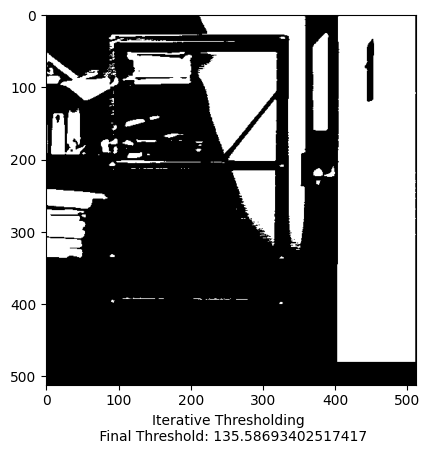

In [ ]:
######Iterative thresholding##########

#Calculating the mean intensity of the image
threshold = np.mean(image)

# Define maximum iterations to avoid infinite loops
max_iterations = 100
iteration = 0
while iteration < max_iterations:
    # Dividing the image into two regions depending on threshold
    region1 = image[image <= threshold]
    region2 = image[image > threshold]

    # Compute mean intensity for both regions
    mean1 = np.mean(region1) if region1.size > 0 else 0
    mean2 = np.mean(region2) if region2.size > 0 else 0

    # Compute the new threshold
    new_threshold = (mean1 + mean2) / 2

    # Break if the threshold has converged
    if np.abs(new_threshold - threshold) == 0:
        break

    threshold = new_threshold
    iteration += 1


    threshold = new_threshold  # Update threshold for the next iteration

#Plot the image using iterative threshold
iterative_threshold = image > threshold
#Displaying Original Image
implot = plt.imshow(iterative_threshold, cmap='gray')
plt.xlabel(f'Iterative Thresholding \n Final Threshold: {threshold}')
plt.show()

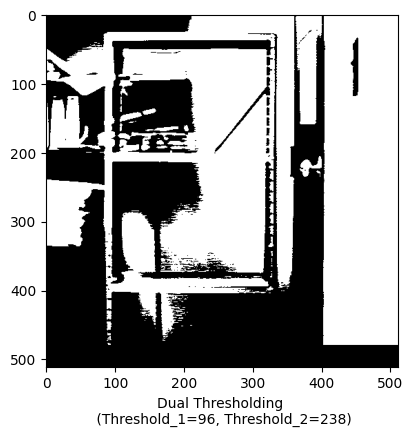

In [ ]:
##########Dual Thresholding with Region Growing#############
# Calculate the mean intensity of the image
mean_intensity = np.mean(image)

# Choose Threshold_1 and Threshold_2 based on the histogram
Threshold_1 = 0
Threshold_2 = 0

# Find the highest intensity point less than the mean (for Threshold_1)
max_left = -1
for i in range(1, len(hist_image)):
  if i < mean_intensity and hist_image[i] > max_left:
        max_left = hist_image[i]
        Threshold_1 = i


# Find the highest intensity point greater than or equal to the mean (for Threshold_2)
max_right = -1
for i in range(1, len(hist_image)):
    if i >= mean_intensity and hist_image[i] > max_right:
        max_right = hist_image[i]
        Threshold_2 = i

# Partition the image into 3 regions based on Threshold_1 and Threshold_2
Region_1 = image < Threshold_1  # Region 1 (Background)
Region_2 = (image >= Threshold_1) & (image <= Threshold_2)  # Region 2 (Region of interest)
Region_3 = image > Threshold_2  # Region 3 (Foreground)

# Region Growing - Reassign pixels from Region_2 based on neighbors
dual_change = True
while dual_change:
    dual_change = False
    for i in range(1, image.shape[0] - 1):  # Loop through rows
        for j in range(1, image.shape[1] - 1):  # Loop through columns
            if Region_2[i, j]:  # If the pixel belongs to Region_2
                neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]  # Neighbors
                for ni, nj in neighbors:
                    if Region_1[ni, nj] or Region_3[ni, nj]:  # If neighbor is in Region_1 or Region_3
                        Region_1[i, j] = True
                        Region_3[i, j] = True
                        Region_2[i, j] = False
                        dual_change = True

# Reassign remaining Region_2 pixels to Region_3
Region_3[Region_2] = True
Region_2[Region_2] = False

# Combining Region_1 and Region_3
dual_image = np.zeros_like(image)
dual_image[Region_1] = 0   # Background (black)
dual_image[Region_2] = 128 # Region of interest (gray)
dual_image[Region_3] = 255 # Foreground (white)

# Plot the binary image
plt.figure(figsize=(10, 12))
plt.subplot(1, 2, 2)
plt.xlabel(f"Dual Thresholding \n (Threshold_1={Threshold_1}, Threshold_2={Threshold_2})")
plt.imshow(dual_image, cmap='gray')
plt.show()



